## Lab: MNIST Autoencoder

You will now work on an autoencoder that works on the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). This will encode the inputs to lower resolution images. The decoder should then be able to generate the original input from this compressed representation.


In [1]:
# %tensorflow_version 2.x

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

c:\Users\sanja\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  25%|██▌       | 1/4 [00:01<00:04,  1.57s/ url]

Dl Completed...:  75%|███████▌  | 3/4 [00:02<00:00,  1.16 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:03<00:00,  1.15 url/s]


Dataset mnist downloaded and prepared to C:\Users\sanja\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [4]:
#Bulid the Model
def auto(inputs):
  encoder=tf.keras.layers.Dense(units=32,activation='relu')(inputs)
  decoder=tf.keras.layers.Dense(units=784,activation='sigmoid')(encoder)
  return encoder,decoder

# set the input shape
inputs=tf.keras.layers.Input(shape=(784,))

# get the encoder and decoder output
encoderoutput,decoderoutput=auto(inputs)

# setup the encoder Model because you will visualize its output later
encoder=tf.keras.Model(inputs=inputs,outputs=encoderoutput)
# setup the autoencoder Model
autoencoder=tf.keras.Model(inputs=inputs,outputs=decoderoutput)

In [5]:
# Compile the model using Adam Optimizer , binary_crossentropy and  metrics=['accuracy']
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy')

In [6]:
# train the model using train_dataset,steps_per_epoch=step,epochs=10
step=60000//BATCH_SIZE
his = autoencoder.fit(train_dataset,steps_per_epoch=step,epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3200
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1504
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1227
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1097
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1025
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0983
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0962
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0951
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0945
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0942
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0939
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0938
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0936
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0935
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 11s 24m

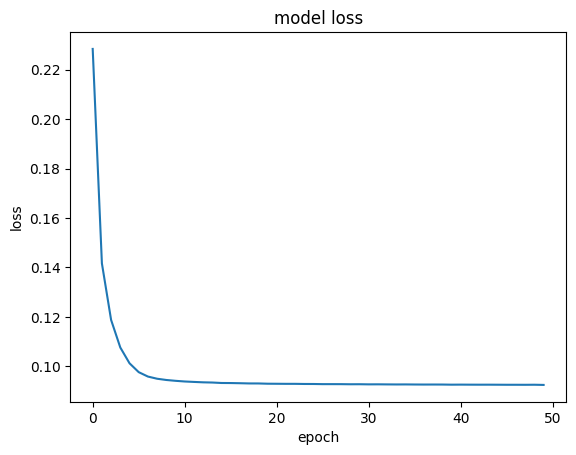

In [7]:
plt.plot(his.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


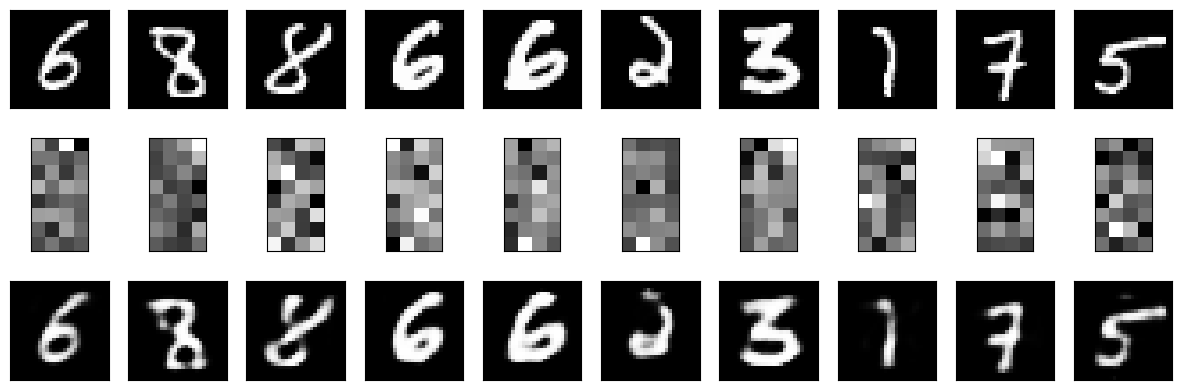

In [9]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])